#  DataCo Global  - Predicting Product Sales and Crafting Optimal Inventory Strategy

# Introduction

<p>Managing the ever-evolving landscape of customer demand is a core challenge for supply chain professionals. Traditionally, demand forecasting has relied on a combination of expert intuition and basic statistical methods applied to historical data. While effective for smaller, stable product categories, this approach becomes limited as businesses grow and confront increasingly complex product lines with fluctuating demand patterns. In such cases, traditional methods may lack the precision and scalability required to keep up, potentially leading to inventory inefficiencies and missed sales opportunities.</p>

<p>This project introduces a scalable, data-driven approach to demand forecasting using Python, designed to support comprehensive inventory optimization. The primary objective was to build a demand forecasting model that incorporates essential inventory management principles, such as reorder points, safety stock, and Economic Order Quantity (EOQ), to enable data-driven decision-making and improved inventory control.</p>

<p>Two critical business questions guided this analysis:</p>
<ul>
  <li>What is the projected demand for the top-selling product over the next 24 months?</li>
  <li>What is the optimal inventory level for this product to meet customer demand while minimizing costs?</li>
</ul>

<p><b>Executive Summary</b></p>

<p>After developing and validating the demand forecasting model, the analysis revealed key trends, seasonality patterns, and holiday effects that influence demand for the top-selling product. Using insights derived from the dataset, we established an optimized inventory policy tailored to these findings:</p>

<p>Given the consistent pricing for the top-selling product (<code>Card ID 365</code>), demand is anticipated to remain stable over the next two years, with periodic dips observed each third quarter (notably in both 2015 and 2016). By identifying and addressing the primary drivers behind these seasonal fluctuations, the company can potentially smooth out these dips and enhance overall sales performance.</p>

<p>The recommended inventory policy for the top-selling product is as follows:</p>
<ul>
  <li><b>Reorder Point</b>: 3,722 units</li>
  <li><b>Economic Order Quantity (EOQ)</b>: 35 units</li>
  <li><b>Safety Stock</b>: 2,252 units</li>
</ul>

<p>This policy suggests that the company should reorder stock when inventory levels reach 3,722 units, with an optimal order size of 35 units to maintain efficient inventory levels. Implementing this policy enables the company to align stock levels more precisely with demand, ensuring product availability and minimizing carrying costs. Through this data-driven, scalable forecasting approach, the company is positioned to enhance inventory efficiency and adapt more effectively to changing market demands.</p>


<h1>Project Outline</h1>
<p>This project was conducted through the following key steps:</p>
<ul>
  <li>Conducted an Exploratory Data Analysis to uncover underlying patterns in the data.</li>
  <li>Performed data cleaning and preparation to ensure the dataset was ready for modeling.</li>
  <li>Built a time series forecasting model using Prophet to project demand trends.</li>
  <li>Evaluated model performance to confirm accuracy and reliability.</li>
  <li>Interpreted findings and addressed the core business questions of the project.</li>
</ul>


<h1>Problem Statement</h1>
<div class="card">
  <p>Managing large product categories and fluctuating consumer demand presents a scaling challenge for traditional demand forecasting methods. An advanced approach is needed to minimize guesswork and prevent the costly consequences of ineffective inventory management.</p>
</div>


<h1>Prerequisites</h1>
<li>Python Programming </li>
<li>Time Series Analysis</li>
<li>Understanding of inventory management and optimizaton</li>

<h1>Project Dependencies</h1>


In [12]:
# Import essential libraries
import pandas as pd
import numpy as np  # for numerical operations
import math  # for mathematical functions

# Visualization libraries
import seaborn as sns  # for statistical plots
import matplotlib.pyplot as plt  # for general plotting
import squarify  # for creating tree maps

# File handling and system operations
import os
import sys

# Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Model building and fitting
from sklearn.ensemble import RandomForestClassifier
from prophet import Prophet

# Model evaluation and tuning
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

<h1>Exploratory Data Analysis</h1>
<p>
The provided <a href="https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis">dataset</a> contains customer demand information across 53 features (columns).
</p>
<p>
To gain insights from the data, we will perform exploratory data analysis using the following methods:
</p>
<ul class="task-list">
  <li>Conduct a visual inspection of the data.</li>
  <li>Create exploratory data visualizations (univariate and bivariate analyses).</li>
</ul>


<h2>Data Load Inspection</h2>

In [13]:
df = pd.read_csv(r"C:\Users\SVaratharajKannan(36\Downloads\supply chain demand forecast\DataCoSupplyChainDataset.csv", encoding="ISO-8859-1")
df.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class


In [14]:
# To explore the spread of the data, we will use the describe() method to get the summary statistics of the data.
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


<p>Notable observations from the data</p>
  <li>About 55% of orders faced late delivery risks.</li>
  <li>Approximately 75% of products have a price of USD 199.99</li>
  <li>All products are currently in stock.</li>
  <li>75% of customers purchased goods valued at a minimum of $247.40.</li>
<p>
Further analysis will provide deeper insights into the data.
</p>
</details>


<h2 class="anchored">
Data Preprocessing
</h2>
<p>
In this stage, we will focus on historical sales data and product attributes, such as stock level and product category. Additionally, we will analyze the impact of variables contributing to demand patterns, including geographic factors, customer segments, and lead time.
</p>
<h4 class="anchored">
Preprocessing Tasks
</h4>
<ul>
  <li>Drop irrelevant columns</li>
  <li>Drop rows with missing values</li>
  <li>Create new features</li>
  <li>Convert categorical features to numerical features</li>
</ul>
<p>To streamline the dataset for demand forecasting, we will drop columns that are not relevant and engineer new features from the existing data.</p>



<h3>
Drop Irrelevant Columns
</h3>

In [15]:
#| code-fold: true
#| code-summary: "Show the code"

# Drop irrelevant columns
def drop_columns(df, columns_to_drop):
    try:
        df = df.drop(columns=columns_to_drop)
        print(f"{len(columns_to_drop)} columns dropped successfully. Number of columns remaining: {len(df.columns)}")
        return df
    except KeyError as e:
        print(f"""Column(s): {e} not found in dataframe.
              
            No columns dropped.
            Please check that the column names are correct.""")
        return df

# Specify the columns to keep
columns_to_keep = [
    'Days for shipping (real)', 
    'Days for shipment (scheduled)',
    'Customer Country',
    'Sales per customer',
    'Delivery Status', 
    'Late_delivery_risk', 
    'Customer City',
    'Customer Segment',
    'Sales', 'Shipping Mode',
    'Type', 'Product Card Id',
    'Customer Zipcode', 
    'Product Category Id', 
    'Product Name',                    
    'Product Price',
    'Market', 
    'Product Status',
    'shipping date (DateOrders)',
]

# Specify the columns to drop
columns_to_drop = [col for col in df.columns if col not in columns_to_keep]

df = drop_columns(df, columns_to_drop)

34 columns dropped successfully. Number of columns remaining: 19


<h3>Drop Rows with Missing Values</h3>

In [16]:
# drop customer Zip code.
df = df.drop(columns=['Customer Zipcode'])

<h4>Check for Missing Values</h4>

In [18]:
def check_null_values(df):
    null_values = df.isnull().sum()
    if null_values.sum() == 0:
        print("No null values found.")
    else:
        print("Null values found in the following columns:")
        for column, null_count in null_values.iteritems():
            if null_count > 0:
                print(f"- {column}: {null_count} missing values")

# Use the function
check_null_values(df)

No null values found.


<p>In the code above, <code>df.isnull().sum()</code> generates a Series with the column names as the index and the count of null values in each column as the values. If the total of these counts is zero, it indicates that there are no missing values in the DataFrame, and the code prints "No null values found." If there are missing values, the code iterates over the Series to display each column name along with its corresponding count of null values.</p>

<h3>Create New Features</h3>
<p>The dataset includes a <code>shipping date</code> column, which is a <code>DateTime</code> object. From this column, we can extract useful features such as <code>Month</code>, <code>Year</code>, <code>Day</code>, and <code>Day of Week</code> to enhance our analysis.</p>

<ul>
  <li><code>Month</code> - to capture the month for each sale.</li>
  <li><code>Year</code> - to capture the year for each sale.</li>
  <li><code>Day</code> - to capture the day for each sale.</li>
  <li><code>Day of Week</code> - to capture the weekday for each sale.</li>
</ul>

<p>We will also create a new <code>Lead Time</code> column, which calculates the difference between <code>Days for shipment (scheduled)</code> and <code>Days for shipping (real)</code>. This feature will help us assess the impact of lead time on demand.</p>


In [20]:
# Function to create Year, Month, Day, and Weekday columns from a date column
def extract_date_parts(df, date_column, prefix):
    try:
        # Convert the date column to datetime format
        df[date_column] = pd.to_datetime(df[date_column])
        
        # Extract year, month, day, and weekday
        df[f'{prefix} Year'] = df[date_column].dt.year
        df[f'{prefix} Month'] = df[date_column].dt.month
        df[f'{prefix} Day'] = df[date_column].dt.day
        df[f'{prefix} Weekday'] = df[date_column].dt.weekday
        
        # Verify creation of new columns
        created_columns = [f'{prefix} Year', f'{prefix} Month', f'{prefix} Day', f'{prefix} Weekday']
        if all(col in df.columns for col in created_columns):
            print(f"Columns Created: {', '.join(created_columns)}")
            return df
        else:
            print("Error creating columns. Please check that the date column name is correct.")
    except Exception as e:
        print(f"Error creating columns: {e}")
        return df

# Add Lead Time feature from 'Days for shipping (real)' and 'Days for shipment (scheduled)'
df['Lead Time'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']

# Use the function to extract date parts
df = extract_date_parts(df, 'shipping date (DateOrders)', 'Shipping')


Columns Created: Shipping Year, Shipping Month, Shipping Day, Shipping Weekday


In [21]:
# display the shape of the data frame
df.shape

(180519, 23)

<p>We have 23 columns and 1,80,519 entries (rows) in the dataset.</p>

<h3>Data Encoding</h3>
<p>Categorical data, such as customer origin values like <code>UK</code>, <code>USA</code>, and <code>France</code>, is unsuitable for machine learning models in its raw form. To make this data usable, categorical values are converted to numerical values using <code>LabelEncoder</code> from the <code>sklearn</code> library.</p>

<p>Additionally, one-hot encoding is applied to categorical features to prepare the data for machine learning tasks that may require this encoding method.</p>

<p>A <code>prepare_data()</code> function was developed to return two preprocessed DataFrames: one encoded with label encoding and another with one-hot encoding.</p>

<p>For more details on encoding techniques for categorical variables, various guides and resources provide an in-depth explanation of the methods and their applications.</p>


In [22]:
# Select top-selling product
top_product = df['Product Card Id'].value_counts().index[0]
print(f"Filtering and Encoding Dataset for Top Product ID: {top_product}")

from sklearn.preprocessing import LabelEncoder

def prepare_data(df, product_card_id, categorical_cols, columns_to_drop):
    """
    Prepares a DataFrame for bivariate analysis and machine learning by applying 
    label encoding and one-hot encoding to categorical columns and dropping specified columns.

    Parameters:
    df (pandas.DataFrame): The original DataFrame.
    product_card_id (int): The product card ID to filter the DataFrame.
    categorical_cols (list of str): The names of categorical columns to encode.
    columns_to_drop (list of str): The names of columns to drop from the DataFrame.

    Returns:
    tuple: Two DataFrames - one with label encoding for bivariate analysis, 
           and another with one-hot encoding for machine learning tasks.
    """
    try:
        # Filter and create a copy for the specified product
        df_copy = df[df['Product Card Id'] == product_card_id].copy()

        # Apply label encoding
        label_encoder = LabelEncoder()
        df_label_encoded = df_copy.copy()
        for col in categorical_cols:
            df_label_encoded[col] = label_encoder.fit_transform(df_label_encoded[col])

        # Drop specified columns
        df_label_encoded = df_label_encoded.drop(columns=columns_to_drop)

        # Apply one-hot encoding
        df_one_hot_encoded = pd.get_dummies(df_copy, columns=categorical_cols)
        df_one_hot_encoded = df_one_hot_encoded.drop(columns=columns_to_drop)

        print("Data encoding successful")
        return df_one_hot_encoded, df_label_encoded
    except Exception as e:
        print(f"Error preparing data: {e}")
        return None, None

# Define categorical columns and columns to drop
categorical_cols = ['Type', 'Customer Segment', 'Delivery Status', 
                    'Customer City', 'Market', 'Shipping Mode']
columns_to_drop = ['Product Name', 'Days for shipment (scheduled)', 
                   'Sales per customer', 'Days for shipping (real)',
                   'Customer Country', 'shipping date (DateOrders)', 
                   'Product Card Id', 'Product Category Id', 
                   'Product Status', 'Product Price']

# Prepare data for bivariate analysis and machine learning
onehot_encode_df, label_encode_df = prepare_data(df, top_product, categorical_cols, columns_to_drop)

# Rename 'Type' column to 'Payment Type' in both DataFrames
label_encode_df = label_encode_df.rename(columns={'Type': 'Payment Type'})
onehot_encode_df = onehot_encode_df.rename(columns={'Type': 'Payment Type'})


Filtering and Encoding Dataset for Top Product ID: 365
Data encoding successful


<h4>Confirm Encoding of Dataset </h4>

In [23]:
label_encode_df.dtypes

Payment Type            int32
Delivery Status         int32
Late_delivery_risk      int64
Customer City           int32
Customer Segment        int32
Market                  int32
Sales                 float64
Shipping Mode           int32
Lead Time               int64
Shipping Year           int32
Shipping Month          int32
Shipping Day            int32
Shipping Weekday        int32
dtype: object

In [24]:
# Validate the one-hot encoding
onehot_encode_df.dtypes

Late_delivery_risk                int64
Sales                           float64
Lead Time                         int64
Shipping Year                     int32
Shipping Month                    int32
                                 ...   
Market_USCA                        bool
Shipping Mode_First Class          bool
Shipping Mode_Same Day             bool
Shipping Mode_Second Class         bool
Shipping Mode_Standard Class       bool
Length: 589, dtype: object

<p> The dataset is now ready for further analysis and modeling. We can now proceed to conduct exploratory data visualizations to understand distribution of data.</p>

<h1>Exploratory Data Visualizations</h1>
<p>To illustrate the distributions of individual variables and explore relationships between variables and target variables, the following techniques were applied:</p>

<ul>
  <li>Univariate Analysis</li>
  <li>Exploratory Time Series Analysis</li>
</ul>


<h3>Univariate Analysis</h3>
<p>Univariate analysis is a straightforward form of data analysis focused on a single variable. Since only one variable is examined at a time, it does not address causation or relationships with other variables. The primary goal of univariate analysis is to describe the data and identify any inherent patterns.</p>

<h4>Visualizing the Distribution of the Dataset</h4>


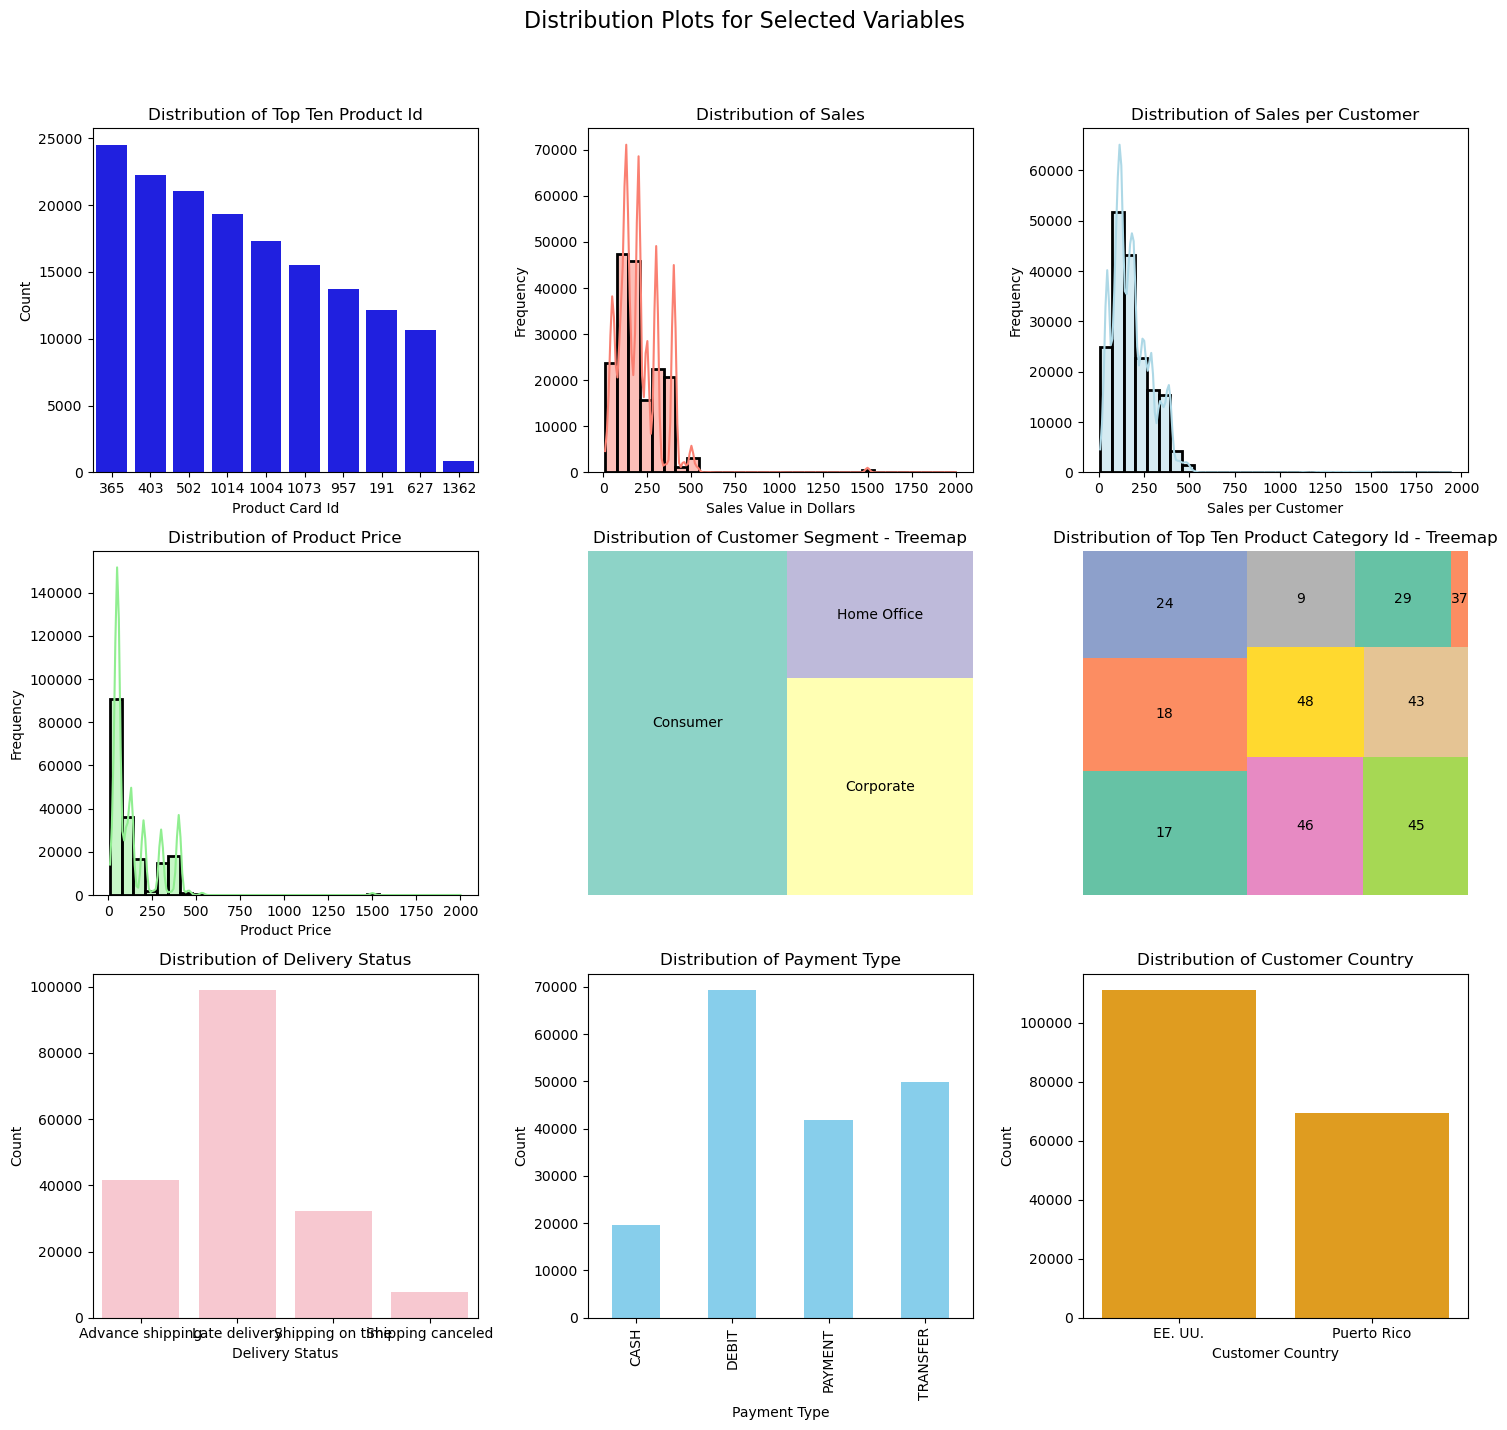

In [25]:
# Set up the figure and axes for a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.suptitle('Distribution Plots for Selected Variables', fontsize=16)

# Create a copy of the DataFrame
df_copy = df.copy()

# 1. Distribution of the top ten products by Product Card Id
sns.countplot(data=df_copy, x='Product Card Id', color='blue', ax=axes[0, 0], 
              order=df_copy['Product Card Id'].value_counts().iloc[:10].index)
axes[0, 0].set_title('Distribution of Top Ten Product Id')
axes[0, 0].set_xlabel('Product Card Id')
axes[0, 0].set_ylabel('Count')

# 2. Distribution of Sales in dollars
sns.histplot(data=df_copy, x='Sales', kde=True, color='salmon', bins=30, linewidth=2, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Sales')
axes[0, 1].set_xlabel('Sales Value in Dollars')
axes[0, 1].set_ylabel('Frequency')

# 3. Distribution of Sales per Customer
sns.histplot(data=df_copy, x='Sales per customer', bins=30, kde=True, color='lightblue', linewidth=2, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Sales per Customer')
axes[0, 2].set_xlabel('Sales per Customer')
axes[0, 2].set_ylabel('Frequency')

# 4. Distribution of Product Price
sns.histplot(data=df_copy, x='Product Price', bins=30, kde=True, color='lightgreen', linewidth=2, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Product Price')
axes[1, 0].set_xlabel('Product Price')
axes[1, 0].set_ylabel('Frequency')

# 5. Treemap of Customer Segment distribution
squarify.plot(sizes=df_copy['Customer Segment'].value_counts(), 
              label=df_copy['Customer Segment'].value_counts().index, 
              color=sns.color_palette("Set3"), ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Customer Segment - Treemap')
axes[1, 1].axis('off')  # Hide axis for treemap

# 6. Treemap of Top Ten Product Category Id
squarify.plot(sizes=df_copy['Product Category Id'].value_counts().iloc[:10],
              label=df_copy['Product Category Id'].value_counts().iloc[:10].index,
              color=sns.color_palette("Set2"), ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Top Ten Product Category Id - Treemap')
axes[1, 2].axis('off')  # Hide axis for treemap

# 7. Distribution of Delivery Status
sns.countplot(data=df_copy, x='Delivery Status', color='pink', ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Delivery Status')
axes[2, 0].set_xlabel('Delivery Status')
axes[2, 0].set_ylabel('Count')

# 8. Distribution of Payment Type (stacked bar chart)
df_copy.groupby(['Type'])['Type'].count().plot(kind='bar', stacked=True, ax=axes[2, 1], color='skyblue')
axes[2, 1].set_title('Distribution of Payment Type')
axes[2, 1].set_xlabel('Payment Type')
axes[2, 1].set_ylabel('Count')

# 9. Distribution of Top Ten Customer Country
sns.countplot(data=df_copy, x='Customer Country', color='orange', ax=axes[2, 2], 
              order=df_copy['Customer Country'].value_counts().iloc[:10].index)
axes[2, 2].set_title('Distribution of Customer Country')
axes[2, 2].set_xlabel('Customer Country')
axes[2, 2].set_ylabel('Count')

# Adjust layout for readability
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display all plots
plt.show()


<h3>Observations from Exploratory Data Visuals</h3>
<p>
The top-selling <code>Product ID</code> is <code>365</code>, identified as the product <code>Perfect Fitness Perfect Rip Deck</code>. This product appears to be fast-moving, and therefore, the demand forecasting process will focus on it.
</p>
<p>
The distributions of <code>Sales Value</code> and <code>Sales per customer</code> are both positively skewed with a long tail, suggesting that most sales are for lower-value products. This insight may indicate a general price sensitivity among the majority of customers.
</p>
<p>
Likewise, the distribution of <code>Product Price</code> is positively skewed, showing that most products fall within a lower price range.
</p>
<p>
The distribution of <code>Customer Segment</code> reveals that the majority of customers belong to the consumer segment.
</p>
</details>


**NOTE**: Based on insights from the univariate analysis, the remainder of the analysis and forecasting will concentrate on the top-selling `Product Card Id` (365, identified as ‘Perfect Fitness Perfect Rip Deck’).

<h3>Exploratory Time Series Visualization</h3>
<p>To analyze the demand patterns of the top-selling product, a time series heatmap will be created to visualize how demand varies over time for this item.</p>

<h4>Time Series HeatMap of Demand</h4>

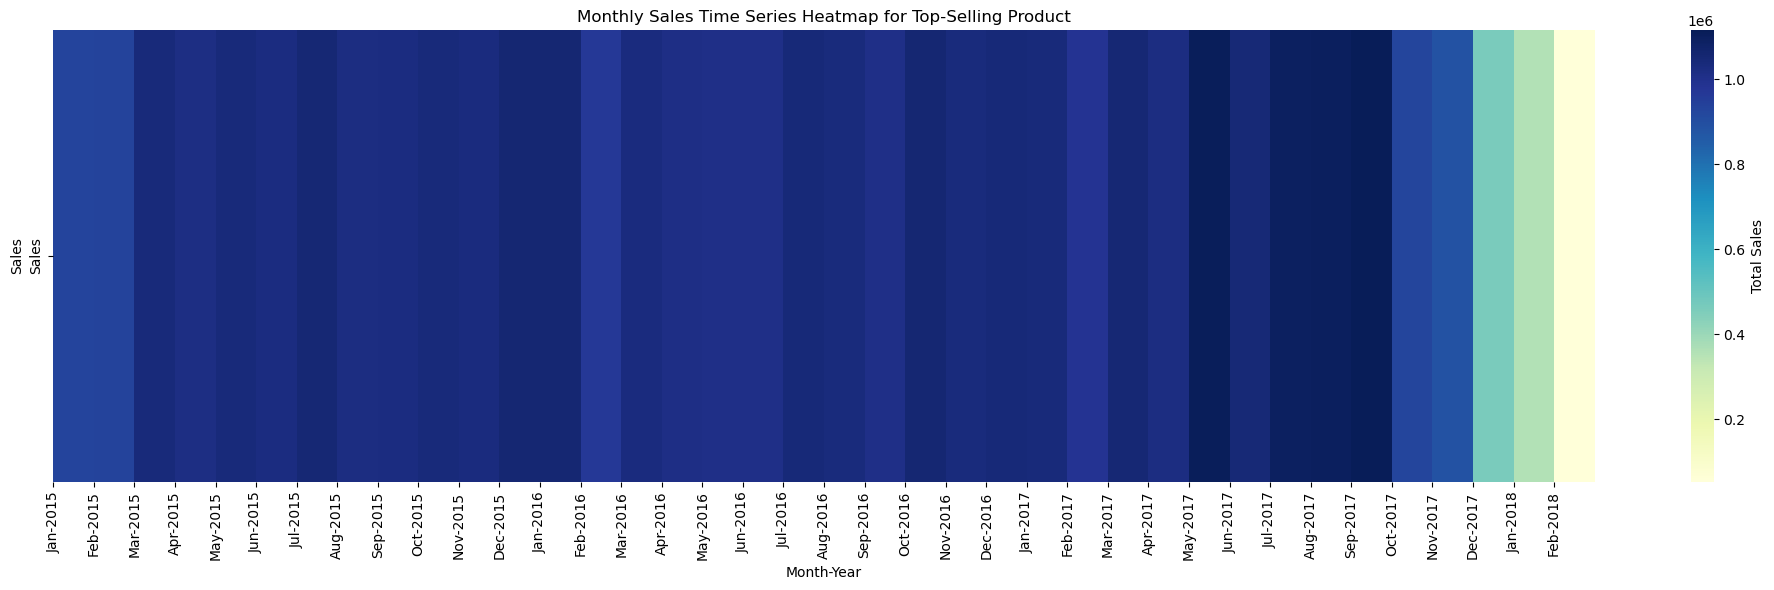

In [30]:
import calendar
# Extract 'shipping date (DateOrders)' and 'Sales' columns for the heatmap
df_heatmap = df[['shipping date (DateOrders)', 'Sales']]

# Set 'shipping date (DateOrders)' as index and resample to month-end frequency
df_heatmap.set_index('shipping date (DateOrders)', inplace=True)
resampled_df = df_heatmap.resample('ME').sum()  # Resample to month-end frequency

# Generate month and year labels for the x-axis
month_labels = [calendar.month_abbr[m.month] + '-' + str(m.year) for m in resampled_df.index]

# Plot the heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(resampled_df.T, cmap='YlGnBu', cbar_kws={'label': 'Total Sales'})
plt.xticks(ticks=range(len(month_labels)), labels=month_labels, rotation=90, ha='center')
plt.title('Monthly Sales Time Series Heatmap for Top-Selling Product')
plt.xlabel('Month-Year')
plt.ylabel('Sales')

# Display the plot
plt.tight_layout()
plt.show()

<p>Based on the consistent shades in the heatmap, it appears that the demand for the top-selling product has been relatively stable over time. Notably, the number of sales recorded during the first quarters of <code>2015</code>, <code>2016</code>, and <code>2017</code> remained steady, while in 2018, sales in the first quarter experienced a significant dip. This is an intriguing observation that warrants further exploration.</p>

<p>Next, the <code>Prophet</code> library will be used to model the demand for this top-selling product. This modeling will help uncover any cyclical patterns in demand over time.</p>


<h1>Forecasting Demand with Prophet</h1>
<p>
Prophet is a forecasting tool developed by Facebook, designed for analyzing time series data that exhibit patterns on various time scales, including yearly, weekly, and daily trends. It offers advanced capabilities for modeling the effects of holidays on a time series and allows for the implementation of custom seasonalities. Prophet is especially useful for demand forecasting and other applications that require accurate predictions of time-dependent patterns.
</p>


In [32]:
# Import Prophet and necessary libraries
from prophet import Prophet
import pandas as pd

# Starting the process
print("Starting Prophet model setup...")

# Step 1: Prepare DataFrame for Prophet
print("Preparing DataFrame for Prophet model...")
prophet_df = df.copy()
prophet_df = prophet_df.rename(columns={'shipping date (DateOrders)': 'ds', 'Sales': 'y'})

# Step 2: Load and Prepare Puerto Rican Holidays
print("Loading custom Puerto Rican holidays from CSV...")
# Specify the path to the CSV file
holidays_path = r'C:\Users\SVaratharajKannan(36\Downloads\supply chain demand forecast\puertorican_holidays.csv'

# Read the CSV file
holidays_df = pd.read_csv(holidays_path)
print("Puerto Rican holidays loaded successfully.")

# Rename columns as required by Prophet
print("Renaming columns for holiday DataFrame...")
holidays_df = holidays_df.rename(columns={'Date': 'ds', 'Name': 'holiday'})

# Drop the 'Type' column if it's not needed
holidays_df = holidays_df.drop(columns=['Type'])

# Set 'lower_window' and 'upper_window' columns for holiday effects
holidays_df['lower_window'] = 0
holidays_df['upper_window'] = 1

# Convert 'ds' to DateTime format
holidays_df['ds'] = pd.to_datetime(holidays_df['ds'])
print("Holiday DataFrame prepared successfully.")

# Step 3: Initialize and Fit the Prophet Model
print("Initializing Prophet model with holidays...")
prophet = Prophet(holidays=holidays_df)

# Fit the model on the prepared DataFrame
print("Fitting the Prophet model to the data...")
prophet.fit(prophet_df)
print("Model fitting completed.")

# Step 4: Create Future DataFrame for Forecasting
print("Creating future dates DataFrame for forecasting...")
future = prophet.make_future_dataframe(periods=365, freq='D')
print("Future DataFrame created successfully.")

# Step 5: Generate Forecast
print("Generating forecast...")
forecast = prophet.predict(future)
print("Forecasting completed successfully.")

# End of process
print("Prophet demand forecasting process finished.")

Starting Prophet model setup...
Preparing DataFrame for Prophet model...
Loading custom Puerto Rican holidays from CSV...
Puerto Rican holidays loaded successfully.
Renaming columns for holiday DataFrame...
Holiday DataFrame prepared successfully.
Initializing Prophet model with holidays...
Fitting the Prophet model to the data...


12:59:14 - cmdstanpy - INFO - Chain [1] start processing
13:05:09 - cmdstanpy - INFO - Chain [1] done processing


Model fitting completed.
Creating future dates DataFrame for forecasting...
Future DataFrame created successfully.
Generating forecast...
Forecasting completed successfully.
Prophet demand forecasting process finished.


<p>
The code above uses the <code>Prophet</code> library to model demand for the top-selling product. The model is trained on the <code>Sales</code> and <code>Shipping Date</code> columns and is set up to forecast demand for this product over the next 365 days.
</p>
<p>
Puerto Rican holidays were included in the model to account for their impact on demand patterns. This adjustment is important, as holidays can have a significant influence on sales.
</p>
<p>
The decision to include Puerto Rican holidays was guided by earlier univariate analysis, which showed that the majority of orders were from Puerto Rico. The <code>forecast</code> variable now contains the forecasted demand values for the top-selling product. We will analyze this variable further in the next steps, but for now, let's focus on evaluating the accuracy of our Prophet model.
</p>

<h3>Evaluating the Accuracy of the Time Series Forecast</h3>

<p>To determine the accuracy of the prophet model, we will use the `cross_validationa()` function provided by `Prophet`</p>

In [33]:
from prophet.diagnostics import cross_validation, performance_metrics

# Perform cross-validation on the Prophet model
df_cv = cross_validation(model=prophet, initial='730 days', period='365 days', horizon='365 days')

  0%|          | 0/1 [00:00<?, ?it/s]

13:05:27 - cmdstanpy - INFO - Chain [1] start processing
13:06:03 - cmdstanpy - INFO - Chain [1] done processing


<p>
The <code>cross_validation()</code> function performs cross-validation on the model by training it on a subset of the data and then evaluating it on the remaining portion. This approach is effective for assessing the model's accuracy on unseen data. The <code>initial</code> parameter specifies the size of the initial training set, while the <code>period</code> parameter defines how frequently forecasts are made throughout the cross-validation process.
</p>
<p>
Now, let’s visualize the model's performance.
</p>


C:\Anaconda3\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
C:\Anaconda3\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


<Figure size 900x600 with 0 Axes>

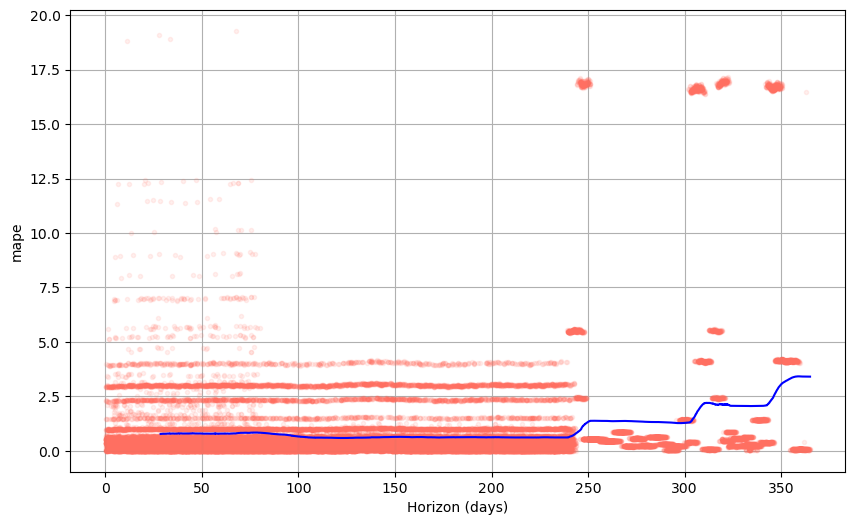

In [34]:
# Import necessary libraries
from prophet.plot import plot_cross_validation_metric

# Set the figure size
plt.figure(figsize=(9, 6))

# Plot MAPE (Mean Absolute Percentage Error) for the cross-validation results
fig = plot_cross_validation_metric(df_cv, metric='mape')

# Customize the color of the points in the plot
fig.get_axes()[0].get_lines()[0].set_markerfacecolor('#FF6F61')  # Set marker face color
fig.get_axes()[0].get_lines()[0].set_markeredgecolor('#FF6F61')  # Set marker edge color

# Display the plot
plt.show()


<p>
The forecast shows lower <code>MAPE</code> (Mean Absolute Percentage Error) values for horizons within the 200-day range; however, accuracy declines for horizons beyond 250 days. This suggests that the model's forecast errors increase significantly for longer-term predictions.
</p>
<p>
To be most valuable for stakeholders, the model should ideally forecast demand accurately beyond 250 days. Increasing the amount of historical data used in training may help reduce MAPE over longer horizons. Nevertheless, there may be opportunities to improve accuracy by optimizing the model's hyperparameters. To explore this, we will apply a hyperparameter tuning technique to find the best combination of parameters for lower MAPE and improved model performance.
</p>
<h4 class="anchored">
Finding the Best Hyperparameter Combination for Lower MAPE
</h4>


In [40]:
from sklearn.model_selection import ParameterGrid

# Prepare data for Prophet with 'ds' and 'y' columns
prophet_df = df.copy()
prophet_df = prophet_df.rename(columns={'shipping date (DateOrders)': 'ds', 'Sales': 'y'})

# Specify ranges of hyperparameters to test
"""param_grid = {
    'seasonality_mode': ["additive", 'multiplicative'],  # Seasonal effect types
    'seasonality_prior_scale': [1, 5, 10, 20],           # Strength of seasonality
    'holidays_prior_scale': [5, 10, 20, 25],             # Strength of holiday effect
    'changepoint_prior_scale': [0.005, 0.01, 0.05, 0.1]  # Flexibility of trend changes
}"""
param_grid = {
    'seasonality_mode': ["additive", "multiplicative"],
    'seasonality_prior_scale': [1, 5, 10],  # Fewer values to reduce combinations
    'holidays_prior_scale': [5, 10],    # Reduced options
    'changepoint_prior_scale': [0.005, 0.05]  # Focus on impactful values
}

# Generate all combinations of hyperparameters using ParameterGrid
param_combinations = ParameterGrid(param_grid)

# Display the number of combinations
print(f"Total hyperparameter combinations: {len(param_combinations)}")

Total hyperparameter combinations: 24


<p>
The code above uses the <code>ParameterGrid</code> function from the <code>sklearn</code> library to create a grid of hyperparameters, generating various combinations to test in the Prophet model. This approach allows for systematic exploration of different parameter settings to find the best fit for the data.
</p>
<p>
In the following code, the <code>cross_validation()</code> function is applied to evaluate the accuracy of the model with each hyperparameter combination. By comparing the Mean Absolute Percentage Error (MAPE) across all combinations, the code identifies the hyperparameters that yield the lowest MAPE, optimizing the model's forecasting accuracy.
</p>


In [42]:
from itertools import product
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import logging

# Suppress excessive logs from cmdstanpy
logging.getLogger("cmdstanpy").setLevel(logging.WARNING)

# Store results in a dictionary
results = {}
param_combinations = list(product(*param_grid.values()))
total_combinations = len(param_combinations)

print(f"Trying all {total_combinations} hyperparameter combinations...")

# Loop over each combination with progress tracking
for i, params in enumerate(param_combinations, start=1):
    # Display progress
    print(f"Running combination {i}/{total_combinations} - {params}")
    
    # Create a Prophet instance with current hyperparameter values
    prophet = Prophet(**dict(zip(param_grid.keys(), params)))

    # Fit the model
    prophet.fit(prophet_df)

    # Perform cross-validation
    df_cv = cross_validation(model=prophet, initial='730 days', period='365 days', horizon='365 days')

    # Calculate performance metrics
    df_metrics = performance_metrics(df_cv, rolling_window=0)

    # Store metrics in the results dictionary
    results[params] = df_metrics['mape'].mean()

    # Optional: Display the current MAPE for the current combination
    print(f"Completed combination {i}/{total_combinations} with MAPE: {results[params]:.4f}")


Trying all 24 hyperparameter combinations...
Running combination 1/24 - ('additive', 1, 5, 0.005)


  0%|          | 0/1 [00:00<?, ?it/s]

Completed combination 1/24 with MAPE: 1.4013
Running combination 2/24 - ('additive', 1, 5, 0.05)


  0%|          | 0/1 [00:00<?, ?it/s]

Completed combination 2/24 with MAPE: 1.4382
Running combination 3/24 - ('additive', 1, 10, 0.005)


  0%|          | 0/1 [00:00<?, ?it/s]

Completed combination 3/24 with MAPE: 1.4013
Running combination 4/24 - ('additive', 1, 10, 0.05)


  0%|          | 0/1 [00:00<?, ?it/s]

Completed combination 4/24 with MAPE: 1.4382
Running combination 5/24 - ('additive', 5, 5, 0.005)


  0%|          | 0/1 [00:00<?, ?it/s]

Completed combination 5/24 with MAPE: 1.4024
Running combination 6/24 - ('additive', 5, 5, 0.05)


  0%|          | 0/1 [00:00<?, ?it/s]

Completed combination 6/24 with MAPE: 1.4390
Running combination 7/24 - ('additive', 5, 10, 0.005)


  0%|          | 0/1 [00:00<?, ?it/s]

Completed combination 7/24 with MAPE: 1.4024
Running combination 8/24 - ('additive', 5, 10, 0.05)


  0%|          | 0/1 [00:00<?, ?it/s]

Completed combination 8/24 with MAPE: 1.4390
Running combination 9/24 - ('additive', 10, 5, 0.005)


  0%|          | 0/1 [00:00<?, ?it/s]

Completed combination 9/24 with MAPE: 1.4022
Running combination 10/24 - ('additive', 10, 5, 0.05)


  0%|          | 0/1 [00:00<?, ?it/s]

Completed combination 10/24 with MAPE: 1.4443
Running combination 11/24 - ('additive', 10, 10, 0.005)


  0%|          | 0/1 [00:00<?, ?it/s]

Completed combination 11/24 with MAPE: 1.4022
Running combination 12/24 - ('additive', 10, 10, 0.05)


  0%|          | 0/1 [00:00<?, ?it/s]

Completed combination 12/24 with MAPE: 1.4443
Running combination 13/24 - ('multiplicative', 1, 5, 0.005)


  0%|          | 0/1 [00:00<?, ?it/s]

Completed combination 13/24 with MAPE: 1.4022
Running combination 14/24 - ('multiplicative', 1, 5, 0.05)


  0%|          | 0/1 [00:00<?, ?it/s]

Completed combination 14/24 with MAPE: 1.4382
Running combination 15/24 - ('multiplicative', 1, 10, 0.005)


  0%|          | 0/1 [00:00<?, ?it/s]

Completed combination 15/24 with MAPE: 1.4022
Running combination 16/24 - ('multiplicative', 1, 10, 0.05)


  0%|          | 0/1 [00:00<?, ?it/s]

Completed combination 16/24 with MAPE: 1.4382
Running combination 17/24 - ('multiplicative', 5, 5, 0.005)


  0%|          | 0/1 [00:00<?, ?it/s]

Completed combination 17/24 with MAPE: 1.4002
Running combination 18/24 - ('multiplicative', 5, 5, 0.05)


  0%|          | 0/1 [00:00<?, ?it/s]

Completed combination 18/24 with MAPE: 1.4423
Running combination 19/24 - ('multiplicative', 5, 10, 0.005)


  0%|          | 0/1 [00:00<?, ?it/s]

Completed combination 19/24 with MAPE: 1.4002
Running combination 20/24 - ('multiplicative', 5, 10, 0.05)


  0%|          | 0/1 [00:00<?, ?it/s]

Completed combination 20/24 with MAPE: 1.4423
Running combination 21/24 - ('multiplicative', 10, 5, 0.005)


  0%|          | 0/1 [00:00<?, ?it/s]

Completed combination 21/24 with MAPE: 1.4000
Running combination 22/24 - ('multiplicative', 10, 5, 0.05)


  0%|          | 0/1 [00:00<?, ?it/s]

Completed combination 22/24 with MAPE: 1.4375
Running combination 23/24 - ('multiplicative', 10, 10, 0.005)


  0%|          | 0/1 [00:00<?, ?it/s]

Completed combination 23/24 with MAPE: 1.4000
Running combination 24/24 - ('multiplicative', 10, 10, 0.05)


  0%|          | 0/1 [00:00<?, ?it/s]

Completed combination 24/24 with MAPE: 1.4375


**NOTE**: The best model is the one with the lowest MAPE value.

In [43]:
# Find the hyperparameters with the lowest RMSE
best_hyperparams = min(results, key=results.get)
print(f"Best Hyperparameters: {dict(zip(param_grid.keys(), best_hyperparams))}")

Best Hyperparameters: {'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10, 'holidays_prior_scale': 5, 'changepoint_prior_scale': 0.005}


<div class="cell-output cell-output-stdout">
<pre><code>Best Hyperparameters: {'seasonality_mode': 'additive', 'seasonality_prior_scale': 10, 'holidays_prior_scale': 5, 'changepoint_prior_scale': 0.005}</code></pre>
</div>

## Tuned Parameter Evaluation

<p>Now, we will rebuild the model using the best-performing hyperparameters identified in the tuning process and evaluate its performance.</p>

In [44]:
# Initialize Prophet model with the best hyperparameters
tuned_prophet = Prophet(
    holidays=holidays_df, 
    seasonality_mode='additive', 
    seasonality_prior_scale=10, 
    holidays_prior_scale=5, 
    changepoint_prior_scale=0.005
)

# Fit the model to the data
print("Fitting the tuned Prophet model...")
tuned_prophet.fit(prophet_df)
print("Model fitting completed.")

# Create a DataFrame with future dates for forecasting (1 year ahead)
print("Creating future DataFrame for the forecast...")
future = tuned_prophet.make_future_dataframe(periods=365, freq='D')
print("Future DataFrame created successfully.")

# Generate forecasts
print("Generating new forecast with tuned model...")
new_forecast = tuned_prophet.predict(future)
print("Forecast generation completed.")

Fitting the tuned Prophet model...
Model fitting completed.
Creating future DataFrame for the forecast...
Future DataFrame created successfully.
Generating new forecast with tuned model...
Forecast generation completed.


Visualizing the forecasted sales trend...


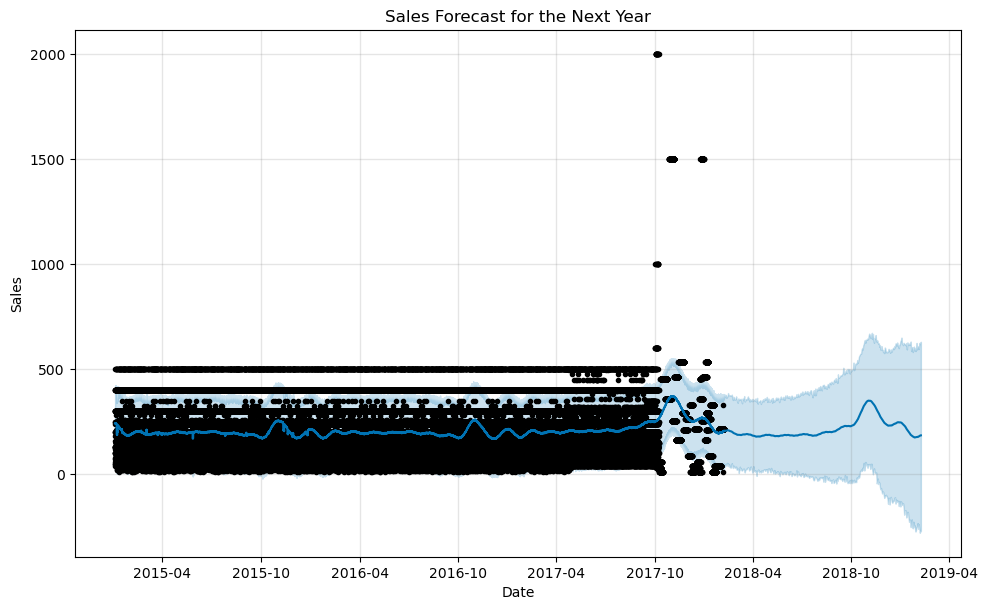

In [52]:
import matplotlib.pyplot as plt

# Visualize the Forecast
# Plot the forecast
print("Visualizing the forecasted sales trend...")
tuned_prophet.plot(new_forecast)
plt.title("Sales Forecast for the Next Year")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

<h5>Cross Validation of the Best Model</h5>

In [48]:
from prophet.diagnostics import cross_validation, performance_metrics

# Perform cross-validation on the tuned Prophet model
print("Starting cross-validation on the tuned model...")
tuned_df_cv = cross_validation(
    model=tuned_prophet, 
    initial='730 days',    # Use the first 730 days for initial training
    period='365 days',     # Make a new forecast every 365 days
    horizon='365 days'     # Forecast 365 days into the future for each period
)
print("Cross-validation completed.")


Starting cross-validation on the tuned model...


  0%|          | 0/1 [00:00<?, ?it/s]

Cross-validation completed.


## Comparison of models - Before and After Hyperparameter tuning

<p>Let’s compare the model’s accuracy before and after hyperparameter tuning to evaluate the improvements.</p>

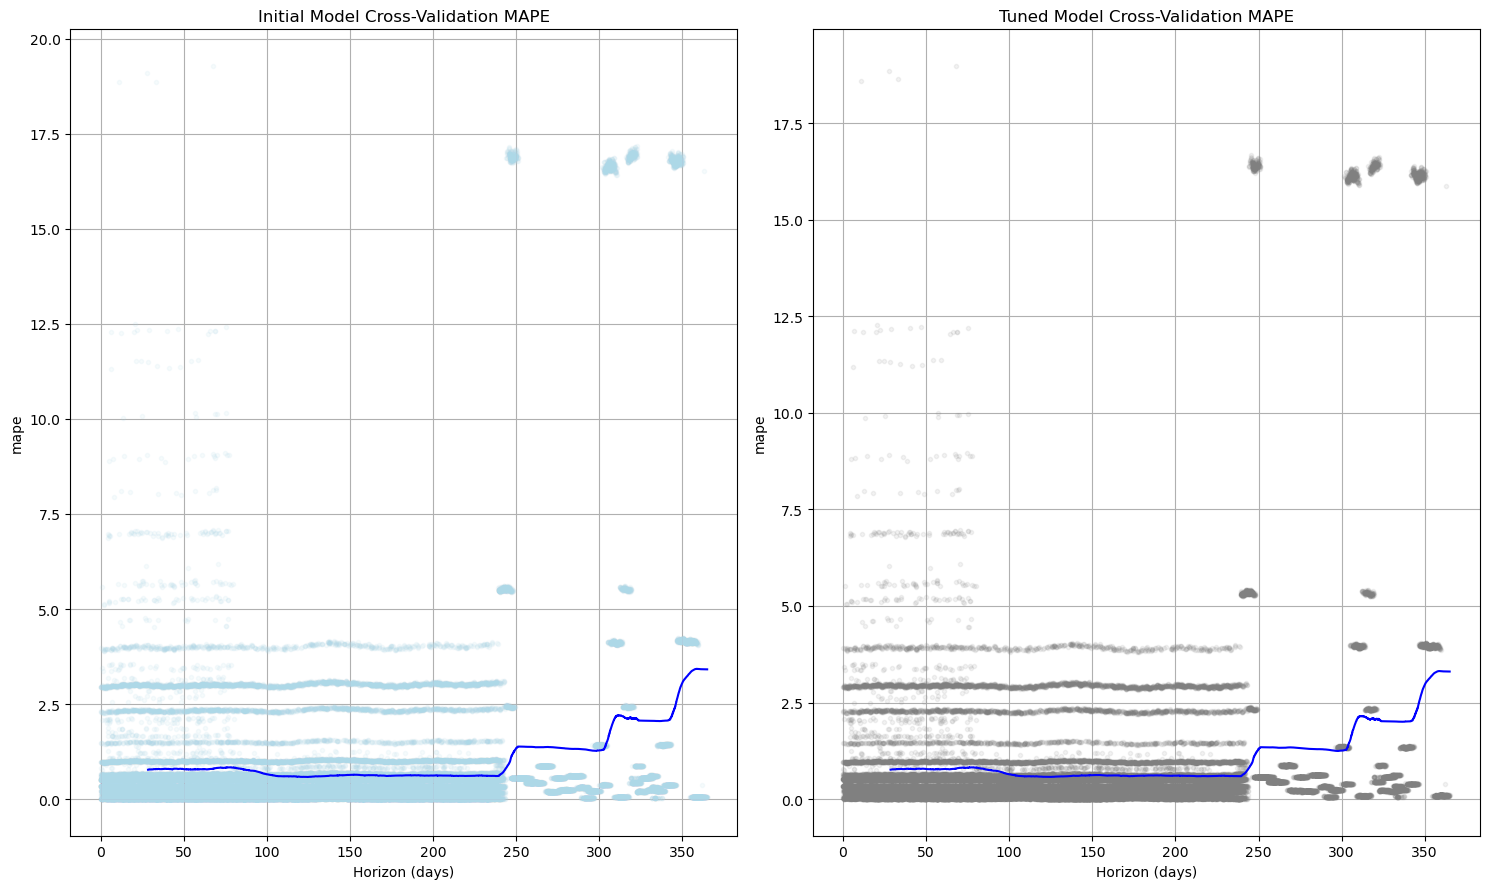

In [53]:
from prophet.plot import plot_cross_validation_metric
warnings.filterwarnings("ignore", message="Series.view is deprecated")

# Set up the figure and axes for side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(15, 9))

# Plot MAPE for the initial model's cross-validation results
fig1 = plot_cross_validation_metric(df_cv, metric='mape', ax=axs[0])
fig1.get_axes()[0].get_lines()[0].set_markerfacecolor('#ADD8E7')  # Set color for data points
fig1.get_axes()[0].get_lines()[0].set_markeredgecolor('#ADD8E7')  # Set edge color for data points
axs[0].set_title('Initial Model Cross-Validation MAPE')  # Add title to first plot

# Plot MAPE for the tuned model's cross-validation results
fig2 = plot_cross_validation_metric(tuned_df_cv, metric='mape', ax=axs[1])
fig2.get_axes()[0].get_lines()[0].set_markerfacecolor('#ADD8E7')  # Set color for data points
fig2.get_axes()[0].get_lines()[0].set_markeredgecolor('#ADD8E9')  # Set edge color for data points
axs[1].set_title('Tuned Model Cross-Validation MAPE')  # Add title to second plot

# Adjust layout and display
plt.tight_layout()
plt.show()


<p>The outcome is not exactly as expected, as the tuned model’s performance remains similar to that of the previous model. This may indicate that the model is not highly sensitive to the hyperparameters. Nonetheless, the model remains valuable for forecasting demand for the top-selling product.</p>


<h4 class="anchored">Forecast Results</h4>
<p>As noted earlier, the <code>forecast</code> variable contains the forecasted values of our <code>Sales</code> time series. Based on this forecast, we will calculate the optimal inventory policy for this specific product.</p>
<p>
The <code>forecast</code> variable is a DataFrame that includes the following columns:
</p>


In [50]:
forecast.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,American Citizenship Day,American Citizenship Day_lower,American Citizenship Day_upper,Christmas Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-03 00:00:00,180.712296,51.856177,389.491992,180.712296,180.712296,0.0,0.0,0.0,0.0,...,-1.326754,-1.326754,-1.326754,39.092372,39.092372,39.092372,0.0,0.0,0.0,217.442027
1,2015-01-03 03:30:00,180.883384,44.777025,370.899475,180.883384,180.883384,0.0,0.0,0.0,0.0,...,-1.405693,-1.405693,-1.405693,38.920191,38.920191,38.920191,0.0,0.0,0.0,217.994246


<p>Before calculating the optimal inventory policy, let’s visualize the forecasted sales data to gain insight into the seasonal patterns and cycles within the forecast.</p>


<h4 class="anchored">
Visuale Forecasted Sales
</h4>

Displaying forecast components for analysis of seasonality, trend, and cycles...


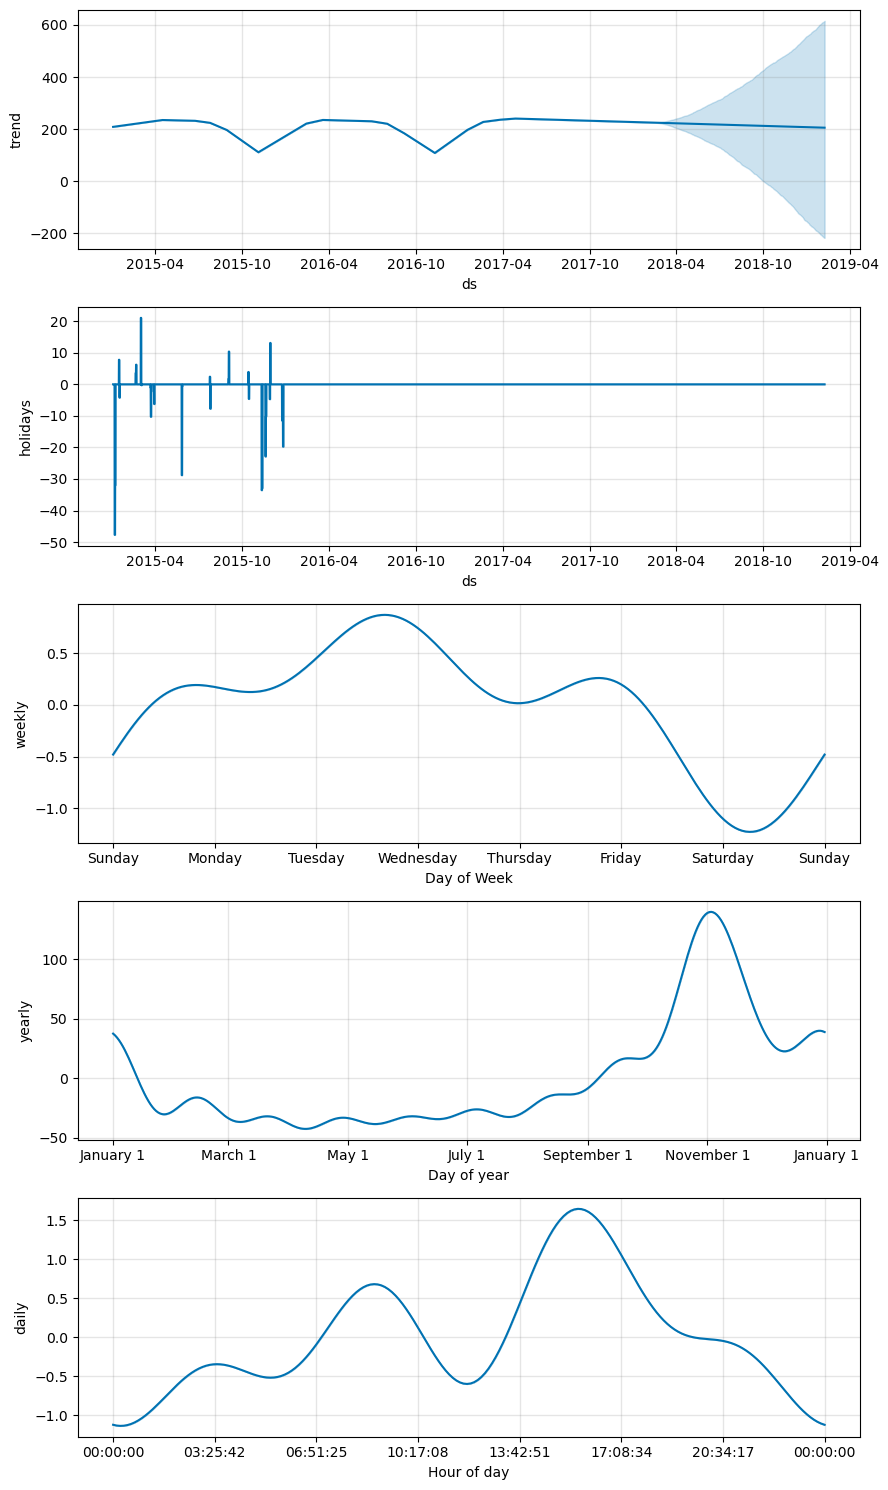

In [54]:
import warnings

# Ignore FutureWarnings to keep the output clean
warnings.filterwarnings("ignore", category=FutureWarning)

# Plot the forecast components to visualize seasonality, trend, and holiday effects
print("Displaying forecast components for analysis of seasonality, trend, and cycles...")
tuned_prophet.plot_components(new_forecast)
plt.show()


<h1 class="anchored">
 Business Question #1 
</h1>



<h5>What is the demand forecast for the top selling product in the next 24 months?</h5>


<p>The sales trend between <code>2015</code> and <code>2017</code> reveals a cycle where product sales remained relatively stable during the second and third quarters of each year. Sales dipped slightly in October, followed by a sharp increase from November through December.</p>
<p>The forecasted sales for the next 24 months indicate a very stable demand pattern. This stability may be influenced by the zero variance observed in the product price, likely contributing to the consistent demand pattern projected for <code>2018</code> and <code>2019</code>. Additionally, it may be worthwhile to investigate the factors that contributed to the cyclical dips between 2015 and 2017.</p>
<p>The impact of Puerto Rican holidays is also visible in the forecasted sales, further highlighting seasonality effects that could inform inventory management decisions.</p>

<h1 class="anchored">Finding Optimal Inventory Policy Based on Forecasted Demand</h1>
<p>With the demand forecast for the top-selling product now established, we can use the forecasted demand to determine the optimal inventory policy for the product.</p>
<p>Calculating the optimal inventory policy will involve determining key inventory markers, including the Reorder Point, safety stock, and Economic Order Quantity (EOQ). These markers will help ensure we maintain sufficient inventory levels to meet customer demand efficiently, while also minimizing overall inventory costs.</p>


<h2>Reorder Point</h2>
<p>The reorder point (ROP) is the inventory level at which new stock should be ordered to avoid stockouts.</p>
<p>It is calculated as the product of the average sales per day and the lead time (also referred to as Lead Time Demand), plus the Safety Stock.</p>


$$ \text{Reorder\ Point} = \text{Lead\ Time\ Demand} + \text{Safety\ Stock} $$ where,


$$ \text{Lead Time Demand} = \text{Average Sales Per Day} \times \text{Lead Time} $$

<p><strong>NOTE:</strong> It is important to distinguish between downstream and upstream lead time.</p>
<p>The <code>Lead Time</code> relevant to the reorder point refers to the time it takes for a product to be delivered from upstream supply chain manufacturers to the store's warehouse. This is the period between the store placing an order and receiving the product.</p>
<p>The current dataset provides only the <code>Days for shipment (scheduled)</code> and <code>Days for shipping (real)</code>, which relate to downstream lead times. Downstream lead time is the time it takes for a product to be delivered to the customer after it has been ordered. However, this is not the lead time required for calculating the reorder point.</p>


<p>For the purposes of our analysis we will assume an average upstream `Lead time` of 7 days </p>

In [57]:
# Extract average forecasted sales per day
average_forecasted_sales = new_forecast['yhat'].mean()

# Define the average lead time
average_lead_time = 7  # 7 days
print(f"Average Lead Time: {average_lead_time} days")

# Calculate Lead Time Demand and round the result
lead_time_demand = round(average_forecasted_sales * average_lead_time,2)
print(f"Lead Time Demand (rounded): {lead_time_demand}")


Average Lead Time: 7 days
Lead Time Demand (rounded): 1469.24


<p>Safety Stock is the buffer stock or additional stock to handle fluctuations in demandand lead time.</p>

$$ \text{Safety Stock} = (\text{Maximum Daily Sales} \times \text{Maximum Lead Time}) - \text{Lead Time Demand}$$


<p>Let’s also assume that there have been delays from the manufacturer in the past, with a maximum lead time of 10 days—three days longer than the average order fulfillment timeline.</p>


In [65]:
# Find maximum daily forecasted sales
max_daily_forecasted_sales = new_forecast['yhat'].max()
print(f"Maximum Daily Forecasted Sales: {max_daily_forecasted_sales}")

# Define maximum lead time, assuming a 3-day delay beyond average lead time
max_lead_time = average_lead_time + 3
print(f"Maximum Lead Time: {max_lead_time} days")

# Calculate safety stock
safety_stock = round((max_daily_forecasted_sales * max_lead_time) - lead_time_demand, 2)
print(f"Safety Stock: {safety_stock}")


Maximum Daily Forecasted Sales: 372.15281687011975
Maximum Lead Time: 10 days
Safety Stock: 2252.29


<p>In conclusion, we can now calculate the reorder point for the top-selling product based on our analysis.</p>

<h3>Summary of Calculations</h3>


In [61]:
# Calculate reorder point and round to two decimal places
reorder_point = round(lead_time_demand + safety_stock, 2)
print(f"The optimal reorder point for the top-selling product is: {reorder_point}")

The optimal reorder point for the top-selling product is: 3721.53


<p> As indicated by the result, the reorder point for the top-selling product is `3722` units, which means that we should reorder more stock when the inventory level reaches `3722` units. This will help us ensure that we have enough stock on hand to meet customer demand while minimizing inventory costs.</p>

<h3>Economic Order Quantity (EOQ)</h3>
<p>Alternatively, we can use the Economic Order Quantity (EOQ) model to calculate the optimal order quantity for the top-selling product. The EOQ model helps determine the ideal order quantity that minimizes total inventory costs, balancing the cost of ordering with the cost of holding inventory.</p>

<p>Unlike the Reorder Point, which focuses on the inventory level at which a new order should be placed to prevent stockouts, the EOQ model considers the costs associated with ordering (such as setup costs) and holding inventory (including storage and opportunity costs).</p>


<p>The Economic Order Quantity (EOQ) formula is given by:</p>

$$ EOQ = \sqrt{\frac{2DS}{H}} $$

<p>where:</p>

<ul>
    <li>\( D \) is the demand rate (number of units demanded annually),</li>
    <li>\( S \) is the ordering cost per order,</li>
    <li>\( H \) is the holding cost per unit per year.</li>
</ul>

<p>This formula helps determine the optimal order quantity that minimizes total inventory costs by balancing ordering and holding costs.</p>


**NOTE**: The demand rate \( D \) can be determined from the existing data. However, the ordering cost \( S \) and holding cost \( H \) are not available in the dataset. For this analysis, we will assume that the ordering cost is `10%` of the product price, and the holding cost is `30%` of the product price.

<h4>Estimating Holding Cost and Ordering Cost</h4>

<h5>Holding Cost</h5>
<p>Holding costs represent the expenses associated with storing inventory, including warehousing, insurance, and security. Additionally, holding costs account for the opportunity cost of capital tied up in inventory.</p> 

<h5>Ordering Cost</h5>
<p>Ordering costs are the expenses incurred during the process of ordering and receiving inventory. These costs include preparing and processing purchase orders, receiving and inspecting goods, and managing the inventory once it arrives.</p>


In [63]:
# Extract the product price of the top-selling product (Product Card ID: 365)
product_price = df[df['Product Card Id'] == 365]['Product Price'].iloc[0]
print(f"The Product Price is: {product_price}")

# Calculate holding cost (10% of product price)
H = round(0.10 * product_price,2)
print(f"The Holding Cost (H) is: {H}")

# Calculate ordering cost (30% of product price)
S = round(0.30 * product_price,2)
print(f"The Ordering Cost (S) is: {S}")

# Calculate forecasted demand rate (average forecasted sales per day)
D = round(new_forecast['yhat'].mean(),2)
print(f"The Demand Rate (D) is: {D}")


The Product Price is: 59.99000168
The Holding Cost (H) is: 6.0
The Ordering Cost (S) is: 18.0
The Demand Rate (D) is: 209.89


<h4>Comprehensive Summary of Calculations</h4>

In [64]:
# Calculate Economic Order Quantity (EOQ)
EOQ = round(math.sqrt((2 * D * S) / H), 2)
print(f"The Economic Order Quantity (EOQ) is: {EOQ} units")

The Economic Order Quantity (EOQ) is: 35.49 units


<p>According to the Economic Order Quantity (EOQ) model, the optimal order quantity for the top-selling product is <code>35</code> units. This suggests that ordering <code>35</code> units at a time will help minimize total inventory costs. By following this order quantity, we can maintain sufficient inventory levels to meet customer demand effectively, while also reducing overall inventory holding and ordering expenses.</p>

<h1 class="anchored">
 Business Question #2 
</h1>

<h5>What is the optimal inventory level for the top selling product?</h5>

<p>The recommended optimal inventory policy for the top-selling product is as follows:</p>
 
<ul>
<li><strong>Reorder Point</strong>: 3,722 units</li>
<li><strong>Economic Order Quantity (EOQ)</strong>: 35 units</li>
<li><strong>Safety Stock</strong>: 2,252 units</li>
</ul>

<p>When inventory of the top-selling product reaches 3,722 units, an order of 35 units should be placed with suppliers. Adopting this inventory policy will help the company maintain adequate stock levels to meet customer demand while optimizing costs associated with inventory management.</p>


<h1>Bonus: Analyzing Key Predictors of Demand Outcomes</h1>
<p>With the demand forecast and optimal inventory policy for the top-selling product established, we can now explore the key predictors of demand outcomes. This analysis will help us gain insights into the factors that influence demand patterns and identify potential opportunities to enhance sales performance.</p>

<p>It is noteworthy that the price of the top-selling product has remained constant throughout the dataset. Therefore, we can reasonably exclude product price as a predictor of demand outcomes for the period under review.</p>


<h3>Hypothesis: Key Predictors of Demand</h3>
<p>A hypothesis has emerged that <code>Product Lead Time</code>, <code>Customer Segment</code>, and certain <code>Geographic Factors</code> may be significant predictors of demand outcomes.</p>
<p>This hypothesis will be tested by conducting a feature importance analysis using the Random Forest algorithm, which provides insights into the relative importance of each feature in predicting demand.</p>


<h4>Correlation Analysis</h4>
<p>Before proceeding with feature importance analysis, a correlation analysis will be conducted to identify potential predictors of demand outcomes.</p>

<p>We will create a correlation matrix using the <code>corr()</code> method and visualize it with a heatmap from the <code>seaborn</code> library. This approach will allow us to observe relationships between variables and assess their potential influence on demand outcomes.</p>
<p>The analysis will be based on the <code>label_encode_df</code> data frame generated during data preprocessing.</p>


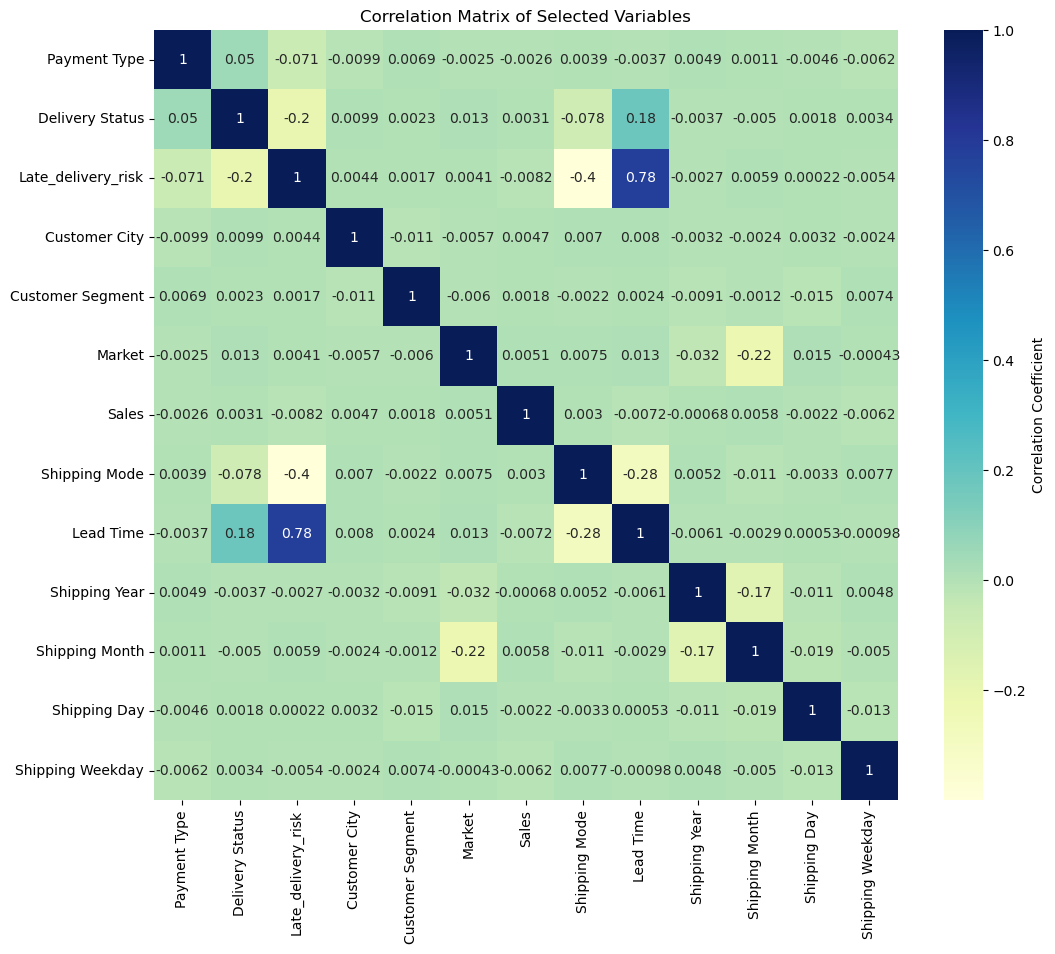

In [68]:
# Perform correlation analysis
correlation_matrix = label_encode_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))  # Adjust figure size for better readability
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='YlGnBu', 
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Matrix of Selected Variables')
plt.show()


<h5>Observation</h5>
<p>The heatmap indicates that there are no strong correlations between the features and the target variable, suggesting that the demand for the top-selling product is not strongly influenced by any single feature.</p>

<h4>Feature Importance Analysis Using Random Forest Regressor</h4>
<p>Since the correlation matrix could not identify the primary predictors of demand outcomes, we will use the Random Forest algorithm to gain further insights. Random Forest is an ensemble learning method that leverages multiple decision trees to improve predictive accuracy. It is especially effective for feature importance analysis.</p>
<p>We will train a Random Forest Regressor model using the <code>onehot_encode_df</code> data frame and use the <code>feature_importances_</code> attribute to identify the key predictors of demand outcomes.</p>


<h5>Model Training - Train Test Split</h5>

In [69]:
from sklearn.model_selection import train_test_split

# Prepare features by excluding the target variable 'Sales'
X_features = onehot_encode_df.drop(columns=['Sales'])

# Drop 'Shipping Year' if it's not relevant for prediction
X_features = X_features.drop(columns=['Shipping Year'])

# Set target variable as 'Sales'
y_target = onehot_encode_df['Sales']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)


<h5>Training the Random Forest Regressor Model</h5>

In [70]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model with specified hyperparameters
rf_model = RandomForestRegressor(
    n_estimators=150,      # Number of trees in the forest
    max_depth=10,          # Maximum depth of each tree
    min_samples_split=2    # Minimum samples required to split a node
)

# Fit the model to the training data
print("Training the Random Forest Regressor model...")
rf_model.fit(X_train, y_train)
print("Model training completed.")

Training the Random Forest Regressor model...
Model training completed.


In [72]:
rf_model

RandomForestRegressor(max_depth=10, n_estimators=150)

<h3>Feature Importance Analysis</h3>

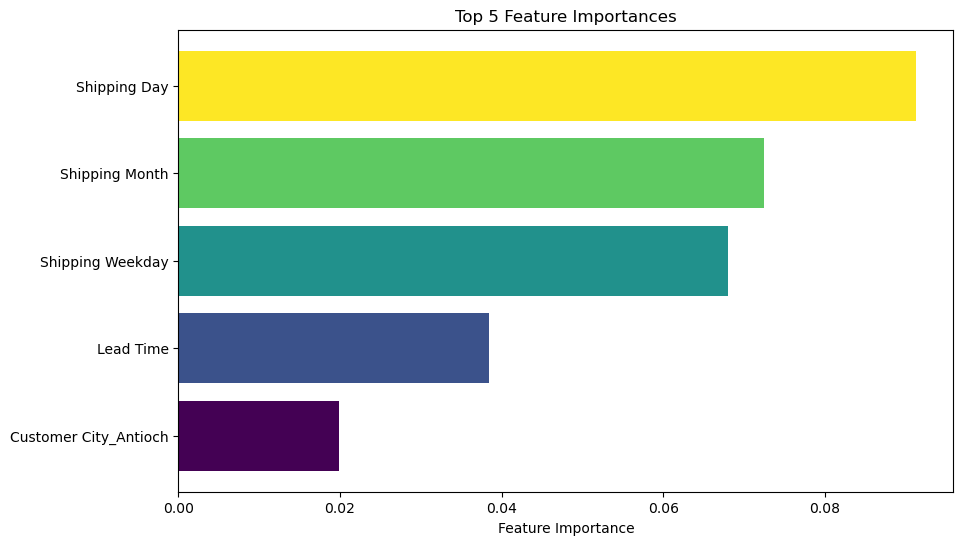

In [73]:
import matplotlib.cm as cm

# Retrieve the feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Identify the indices of the top 5 most important features
top_5_feature_indices = feature_importances.argsort()[-5:]

# Visualize the top 5 important features
plt.figure(figsize=(10, 6))

# Create a color map for the bars
colors = cm.viridis(np.linspace(0, 1, len(top_5_feature_indices)))

# Plot a horizontal bar chart of the top 5 feature importances
plt.barh(X_train.columns[top_5_feature_indices], 
         feature_importances[top_5_feature_indices], 
         color=colors)

plt.xlabel('Feature Importance')
plt.title('Top 5 Feature Importances')
plt.show()

<h4>Results Discussion</h4>

<p>The feature importance analysis largely confirms the initial hypothesis.</p>
<p>As anticipated, <code>Product Lead Time</code> and certain <code>Geographic Factors</code> emerged as top predictors of demand outcomes.</p>
<p>However, <code>Customer Segment</code> was not among the top predictors, providing additional insights into demand patterns. This concludes our analysis.</p>


# Key Takeaway

<ul>
    <li>This project explored the process of building a demand forecasting model using Python.</li>
    <li>The model was applied to optimize inventory management, covering essential concepts such as reorder points, safety stock, and Economic Order Quantity (EOQ).</li>
    <li>The analysis identified trends, seasonality patterns, and holiday effects on the top-selling product based on the provided dataset.</li>
    <li>An optimal inventory policy was established for the top-selling product.</li>
</ul>

<h4>Advantages of this Method for Scalability in Demand Forecasting</h4>

<ol>
    <li>The data processing steps are adaptable, allowing for scalability across larger product categories.</li>
    <li>This approach enhances forecasting speed and accuracy.</li>
    <li>By reducing guesswork and improving reproducibility, this method supports reliable forecast validation.</li>
</ol>
